### Linear Regression

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1) # 100 rows and 1 column
y = 4 + 3 * X + np.random.randn(100,1)

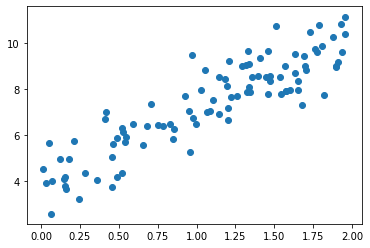

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)), X] # Add column of ones for bias Theta0/x0 = 1

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.00198888],
       [3.11497915]])

**Make Predictions**

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict #y = Theta^T . X

array([[ 4.00198888],
       [10.23194718]])

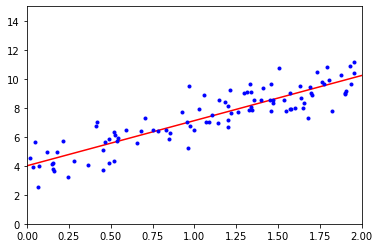

In [16]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b. ")
plt.axis([0, 2, 0, 15])
plt.show()

**Linear Regression using scikit learn**

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([4.00198888]), array([[3.11497915]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.00198888],
       [10.23194718]])

**There is also another way which is using the least squares method, also the pseudoinverse using a standard matrix factorization technique called Singular Value Decomposition**

**Lets optimise using gradient descent**

In [24]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [25]:
theta

array([[4.00198888],
       [3.11497915]])

**However what happens if you have a large training set, since batch gradient descent above, uses the entire data set to compute it may take time for large datasets, this is where stochastic gradient descent comes in. This has a batch size of 1, however this is very random as compared to batch gradient descent**

In [28]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [29]:
theta

array([[4.00371802],
       [3.15469822]])

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) #ravel makes it one flat array

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [3]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.96502875]), array([3.09710654]))

### Polynomial Regression

If we have to fit data which is not linear in fashion this can be used.

In [23]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

array([-0.89670579])

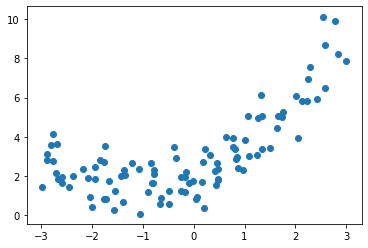

In [24]:
plt.scatter(X, y)
plt.show()

This does not look like a linear regression will fit this well, lets transform the data using the Polynomial Features, which basically, adds more data to X which is the value of X ^ a value.

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [26]:
X[0]

array([-0.89670579])

In [27]:
X_poly[0]

array([-0.89670579,  0.80408127])

X Poly now contains the value of X and its squared value. Now we can try and fit a linear regression to it. 

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([1.97643661]), array([[1.01078009, 0.45684618]]))

So this basically means y = 0.45x^2 + 1.01x + 1.9

In the previous examples, in order to check whether a model was overfitting or underfitting, we used the cross validation set. But however we can also look at the learning curves.

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

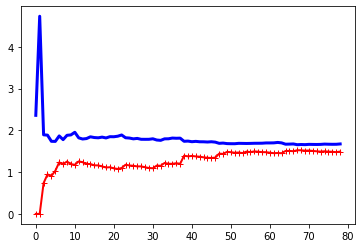

In [45]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Above it is underfitting, the blue is the val and the red is the train. So the error is quite high in the val on minimal number of points but more points lowers the error however it reaches a plateau. Which is similar to the train one, which starts off at 0 and then moves on. This error is quite large though.

Now we look at the 10th order polynomial

In [46]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

In [49]:
polynomial_regression.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False,
                                    interaction_only=False, order='C')),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

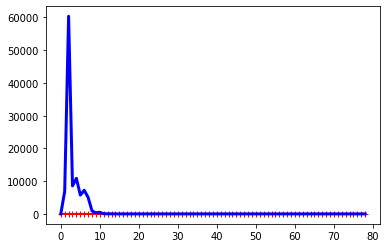

In [50]:
plot_learning_curves(polynomial_regression, X , y)

### Regularisation

Ridge Regression/Regularisation, this is where you would sum all the thetas and multiply it by a learning rate of alpha, the higher the alpha the more flatter the prediction curve is. This will help to reduce overfitting by constraining the weights (thetas). In Sklearn this can also be used as a model in order to predict using the Cholesky method solver). This uses L2 Regularisation which is the Euclidean Norm from the Origin sqrt(x1^2 + x2^2 ....)

In [52]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.50298295]])

Comparing it with Stochastic Gradient Descent(SGD)

In [54]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.46431182])

Lasso Regularisation which uses L1 regularisation which is all the thetas added

In [55]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.44562069])

Now using SGD with L1 Normalisation

In [56]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.47522547])

Elastic Net combines both Ridge and Lasso in its implementation, however it adds a ratio r to the mix.

In [57]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.45057953])

### Logistic Regression
Using the Iris Data Set

In [60]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [66]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

In [75]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

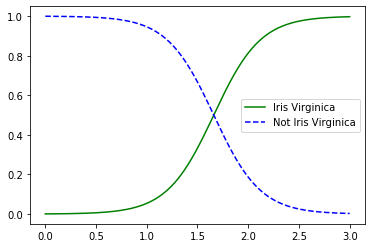

In [111]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris Virginica")
plt.legend()
plt.show()

In [113]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [116]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Softmax Regression which creates a classifier for each one and then finds the one which has the highest probability that it was this class.

In [119]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
softmax_reg.predict([[5,2]])

array([2])

In [121]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [117]:
import dill
dill.dump_session('training_model_env.db')

In [59]:
import dill
dill.load_session('training_model_env.db')